In [1]:
#!pip install neuralprophet

In [1]:
import matplotlib.pyplot as plt
#import geopandas as gpd
import folium
from neuralprophet import NeuralProphet

In [2]:
import pandas as pd
import numpy as np
import pickle

In [3]:
#uploading a spreadsheet of earthquakes
Quake18 = pd.read_excel(r"C:\Users\yelsk\Desktop\programming\Projects DS\Equake\quakes2018.xls")

In [4]:
#defining a 0th row to column headers
Quake18.columns = Quake18.iloc[0]

#deleting columns with no coordinates and no magnitude
Quake18 = Quake18.dropna(subset=['Lat', 'Long'], how='all')
Quake18 = Quake18.dropna(subset=['Md', 'Mb', 'Mw'], how='all')

#droping  felt column
del Quake18['Felt']
Quake18.head(4)

,Year,Month,Day,Hour,Min,Sec,Md,Mb,Mw,Depth,Lat,Long,Region
0,Year,Month,Day,Hour,Min,Sec,Md,Mb,Mw,Depth,Lat,Long,Region
2,2018,1,2,12,49,34.8,NaN,NaN,2.6,80,33.6434,29.5461,E.Mediter.Sea
3,2018,1,2,17,10,56.3,NaN,NaN,1.1,17,32.9713,35.6112,Hula-Kinneret
4,2018,1,5,3,17,18.6,3.4,NaN,NaN,3,35.6572,28.7057,E.Mediter.Sea


In [5]:
#droping  0th row - containing column names
Quakeplt=Quake18.drop(labels=0, axis=0)
Quakeplt.head()

,Year,Month,Day,Hour,Min,Sec,Md,Mb,Mw,Depth,Lat,Long,Region
2,2018,1,2,12,49,34.8,NaN,NaN,2.6,80,33.6434,29.5461,E.Mediter.Sea
3,2018,1,2,17,10,56.3,NaN,NaN,1.1,17,32.9713,35.6112,Hula-Kinneret
4,2018,1,5,3,17,18.6,3.4,NaN,NaN,3,35.6572,28.7057,E.Mediter.Sea
5,2018,1,5,4,33,17.9,NaN,NaN,4,10,36.8857,28.3754,Turkey
6,2018,1,5,12,58,6.3,3.4,NaN,NaN,0,35.6587,28.2143,E.Mediter.Sea


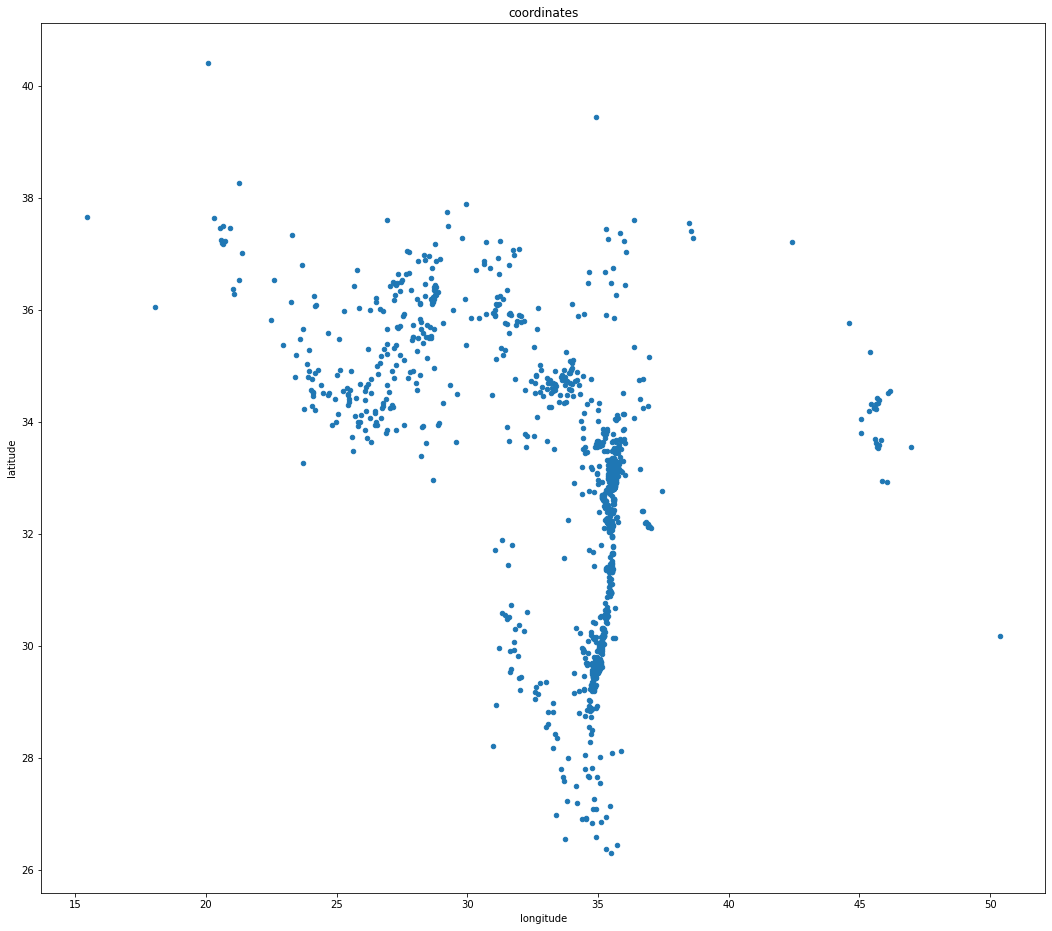

In [6]:
#plotting earthquake's locations
Quakeplt.plot(kind='scatter', x='Long', y='Lat', figsize=(18, 16))
plt.title('coordinates')
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.show()

#plotting earthquake's locations on a map
map = folium.Map(location=[31.50, 35.10], zoom_start=5)

for index, row in Quakeplt.iterrows():
    folium.CircleMarker(location=[row["Lat"], row["Long"]],radius=2).add_to(map)
map

In [7]:
#list of all region names in a dataframe
Quakeplt['Region'].unique()

array(['E.Mediter.Sea', 'Hula-Kinneret', 'Turkey', 'Roum', nan, 'Arava',
       'Carmel-Tirza', 'Iraq', 'Yamune', 'Galilee', 'Jordan-valley',
       'Egypt', 'Cyprus', 'E.Shomron', 'Judea-Samaria', 'Arif-fault',
       'Dead-Sea-Basin', 'Red-Sea', 'Suez', 'W.sirhan', 'Eilat-Deep',
       'Central-Israel', 'Sinai', 'Aragonese_Deep', 'East-Sinai',
       'Barak-fault', 'Palmira', 'Saudi-Arabia', 'Lebanon', 'W.Sirhan',
       'Syria', 'Negev', 'Sharon', 'Thamad', 'Northen-Jordan',
       'Paran-fault', 'Aragonese-Deep', 'Jordan-Valley', 'Jordan',
       'Arnona-Dakar-Deep', 'arava'], dtype=object)

In [8]:
# earthquakes in 'arava' and 'jordan valley' regions
Quake_aravajordanvalley=Quakeplt.loc[Quakeplt['Region'].isin(['Arava','Jordan-valley'])]

#only earthquakes in a dead sea region
Quake_DS=Quakeplt.loc[Quakeplt['Region']=='Dead-Sea-Basin']
Quake_DS.head()

,Year,Month,Day,Hour,Min,Sec,Md,Mb,Mw,Depth,Lat,Long,Region
88,2018,2,1,17,20,58.5,NaN,NaN,1.7,2,30.965,35.3953,Dead-Sea-Basin
100,2018,2,5,1,38,37.1,NaN,NaN,1.4,8,31.5136,35.5269,Dead-Sea-Basin
115,2018,2,10,4,19,42.5,2.3,NaN,2.4,21,31.1,35.5186,Dead-Sea-Basin
170,2018,2,26,20,9,24.4,NaN,NaN,1.1,24,31.2394,35.4168,Dead-Sea-Basin
226,2018,3,19,11,36,32.6,NaN,NaN,1.1,17,31.1592,35.4171,Dead-Sea-Basin


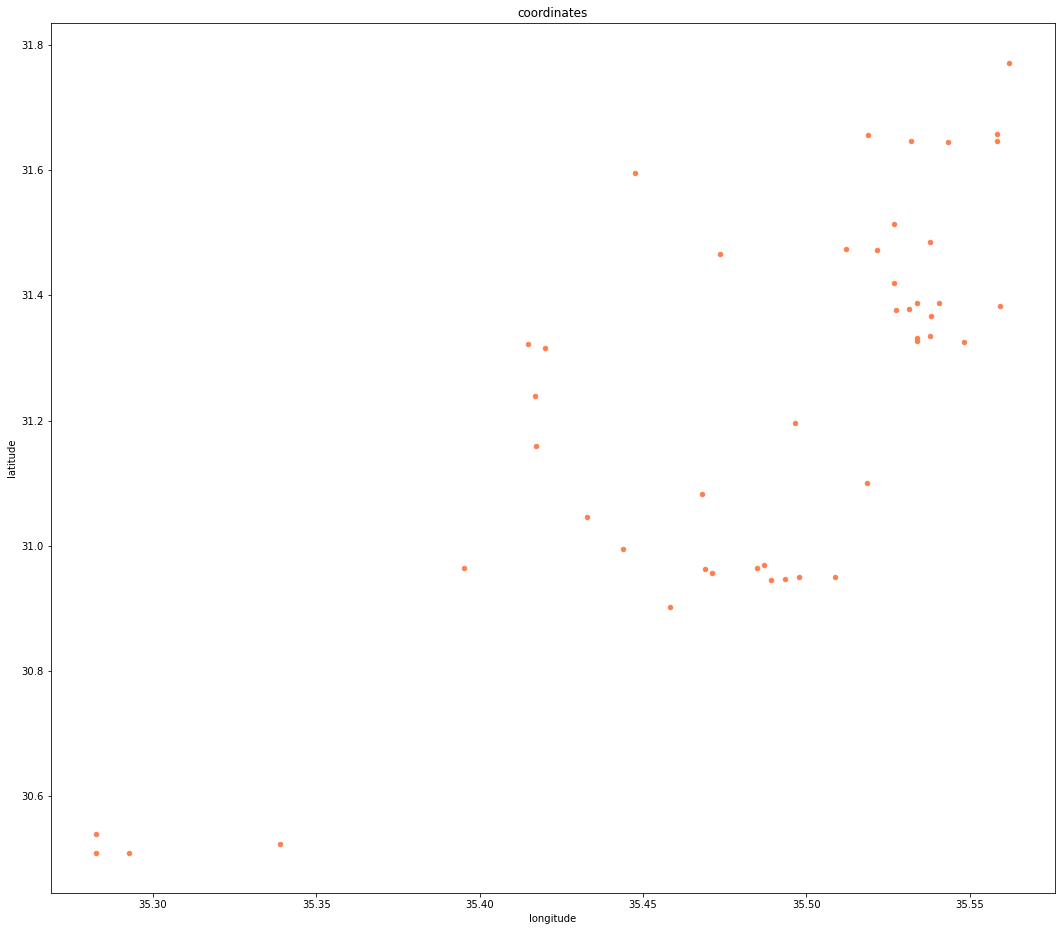

In [21]:
#plotting earthquake's locations of dead sea valley
Quake_DS.plot(kind='scatter', x='Long', y='Lat',figsize=(18, 16),c='coral')
#Quake_aravajordanvalley
plt.title('coordinates')
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.show()

In [10]:
#plitting on a map with folium
map = folium.Map(location=[31.17, 35.1], zoom_start=9)

for index, row in Quake_DS.iterrows():
    folium.CircleMarker(location=[row["Lat"], row["Long"]], radius=4).add_to(map)
map

In [11]:
#time column from 'Hour', 'Min', 'Sec' columns
Quakeplt['Time'] = Quakeplt['Hour'].astype(str) + ':' + Quakeplt['Min'].astype(str) + ':' + Quakeplt['Sec'].apply(np.floor).astype(str) #round seconds down

#creating timesatnps out of 'Year', 'Month', 'Day', 'Hour', 'Min', 'Sec' columns
Quakeplt['Datetime'] = pd.to_datetime(Quakeplt[['Day','Month','Year', 'Time']].astype(str).apply(' '.join, 1), format='%d %m %Y %H:%M:%S')
Quakeplt.head()

#to display column names
#Quakeplt.columns

,Year,Month,Day,Hour,Min,Sec,Md,Mb,Mw,Depth,Lat,Long,Region,Time,Datetime
2,2018,1,2,12,49,34.8,NaN,NaN,2.6,80,33.6434,29.5461,E.Mediter.Sea,12:49:34,2018-01-02 12:49:34
3,2018,1,2,17,10,56.3,NaN,NaN,1.1,17,32.9713,35.6112,Hula-Kinneret,17:10:56,2018-01-02 17:10:56
4,2018,1,5,3,17,18.6,3.4,NaN,NaN,3,35.6572,28.7057,E.Mediter.Sea,3:17:18,2018-01-05 03:17:18
5,2018,1,5,4,33,17.9,NaN,NaN,4,10,36.8857,28.3754,Turkey,4:33:17,2018-01-05 04:33:17
6,2018,1,5,12,58,6.3,3.4,NaN,NaN,0,35.6587,28.2143,E.Mediter.Sea,12:58:6,2018-01-05 12:58:06


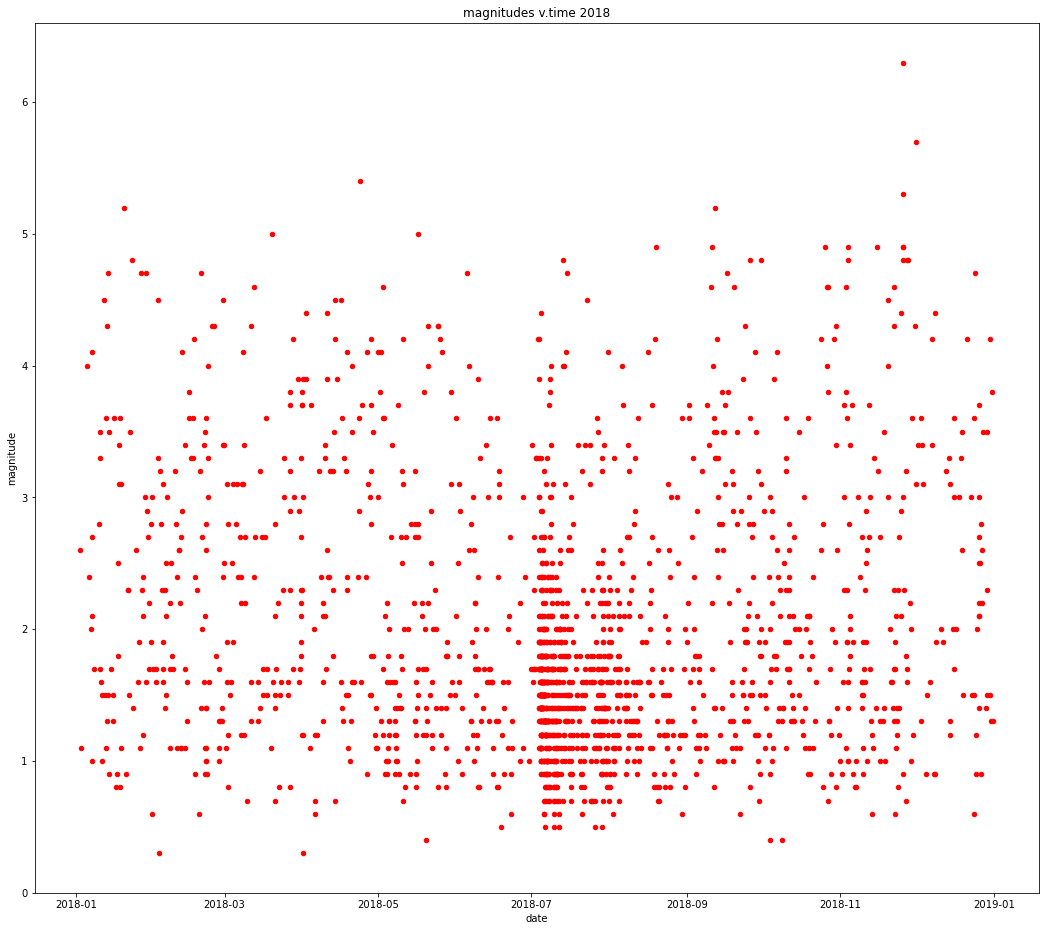

In [12]:
#plotting earthquake's magnitude(Mw) vs time in 2018
Quakeplt.plot(kind='scatter', x='Datetime', y='Mw',figsize=(18, 16),c='red')
plt.title('magnitudes v.time 2018')
plt.xlabel('date')
plt.ylabel('magnitude')

plt.show()

In [13]:
#all earthquakes (not only arava even though the name has _Ar in it)
Quake_Ar=Quakeplt
##only earthquakes in Arava/(dead sea) region
#Quake_Ar=Quakeplt.loc[Quakeplt['Region']=='Arava']
Quake_Ar.head()

,Year,Month,Day,Hour,Min,Sec,Md,Mb,Mw,Depth,Lat,Long,Region,Time,Datetime
2,2018,1,2,12,49,34.8,NaN,NaN,2.6,80,33.6434,29.5461,E.Mediter.Sea,12:49:34,2018-01-02 12:49:34
3,2018,1,2,17,10,56.3,NaN,NaN,1.1,17,32.9713,35.6112,Hula-Kinneret,17:10:56,2018-01-02 17:10:56
4,2018,1,5,3,17,18.6,3.4,NaN,NaN,3,35.6572,28.7057,E.Mediter.Sea,3:17:18,2018-01-05 03:17:18
5,2018,1,5,4,33,17.9,NaN,NaN,4,10,36.8857,28.3754,Turkey,4:33:17,2018-01-05 04:33:17
6,2018,1,5,12,58,6.3,3.4,NaN,NaN,0,35.6587,28.2143,E.Mediter.Sea,12:58:6,2018-01-05 12:58:06


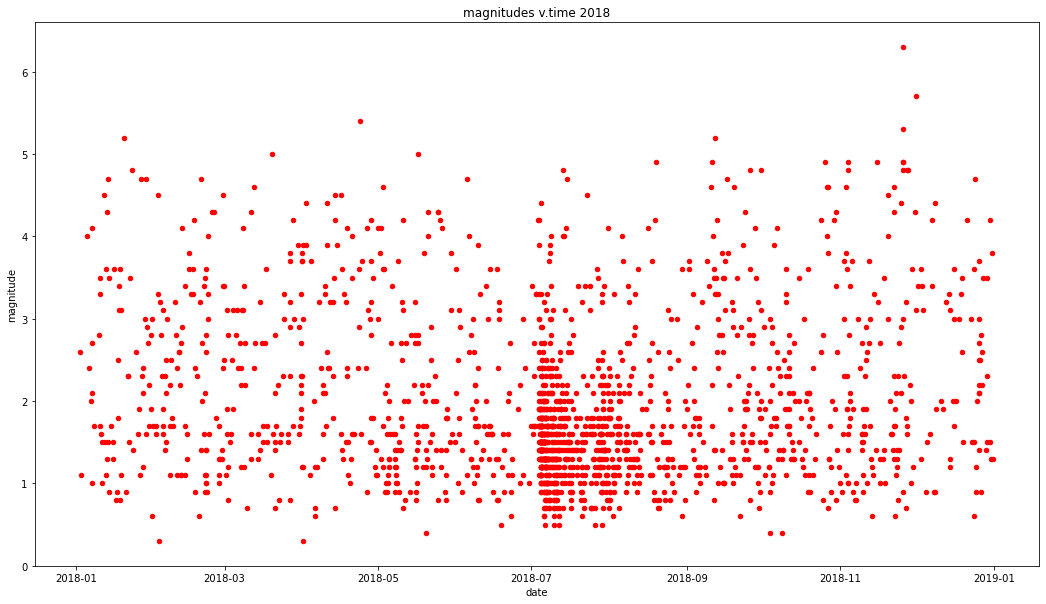

In [14]:
#plotting earthquake's magnitude(Mw) vs time in 2018 of dead sea basin
Quake_Ar.plot(kind='scatter', x='Datetime', y='Mw',figsize=(18, 10),c='red')
plt.title('magnitudes v.time 2018')
plt.xlabel('date')
plt.ylabel('magnitude')

plt.show()

In [15]:
#checking data types in a dataframe
Quake_Ar.dtypes

0
Year                object
Month               object
Day                 object
Hour                object
Min                 object
Sec                 object
Md                  object
Mb                  object
Mw                  object
Depth               object
Lat                 object
Long                object
Region              object
Time                object
Datetime    datetime64[ns]
dtype: object

# Prediction with SK-learn and XGBoost

In [66]:
check1 = Quakeplt.loc[Quakeplt['Region'].isin(['Arava','Jordan-valley','Dead-Sea-Basin'])]


In [67]:
#plitting on a map with folium
map = folium.Map(location=[31.17, 35.1], zoom_start=9)

for index, row in check1.iterrows():
    folium.CircleMarker(location=[row["Lat"], row["Long"]], radius=4).add_to(map)
map

In [68]:
DS_N_S = Quakeplt[['Datetime', 'Lat']].loc[Quakeplt['Region'].isin(['Arava','Jordan-valley','Dead-Sea-Basin'])]
DS_N_S.set_index('Datetime', inplace=True)
DS_N_S.head()
len(DS_N_S)

180

In [57]:
#make lags - features for predictive model
lags = pd.DataFrame({
                   #change y to Yy in those lines to see the lags graph for 'residuals' after prediction of seasonality
    'lat_lag_1': DS_N_S['Lat'].shift(1),
    'lat_lag_2': DS_N_S['Lat'].shift(2),
    'lat_lag_3': DS_N_S['Lat'].shift(3),
    'lat_lag_4': DS_N_S['Lat'].shift(4),
    'lat_lag_5': DS_N_S['Lat'].shift(5),
    'lat_lag_6': DS_N_S['Lat'].shift(6),
    'lat_lag_7': DS_N_S['Lat'].shift(7),
    'lat_lag_8': DS_N_S['Lat'].shift(8),
    'lat_lag_9': DS_N_S['Lat'].shift(9),
    'lat_lag_10':DS_N_S['Lat'].shift(10)
}).fillna(0.0)

# Multistep targets
leads = pd.DataFrame({
    'lat_step_3': DS_N_S['Lat'].shift(-2),
    'lat_step_2': DS_N_S['Lat'].shift(-1),
    'lat_step_1': DS_N_S['Lat'],
}).dropna()


data = pd.concat({'Targets': leads, 'Features': lags}, axis=1)

#display the head of our prepared (for forecasting) dataset, 
#'style.set_properties' used to set the butified features like background to make the display better and more appealing
data.head().style.set_properties(['Targets'], **{'background-color': 'LavenderBlush'}) \
                   .set_properties(['Features'], **{'background-color': '#fad1c2'})

In [58]:
# dropna in leads (cell above) has created indexes that don't match. Only keep times for
# which we have both targets and features.
leads, lags = leads.align(lags, join='inner', axis=0)

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor

## 1.Multioutput model w. linear regression - 3 step horizon with no lead time and 6 lags (1-7, but not 5 - from correlogram)
# Create splits
X_train, X_test, y_train, y_test = train_test_split(lags, leads, test_size=0.2, shuffle=False)

MO_model = LinearRegression()
MO_model.fit(X_train, y_train)

y_fit = pd.DataFrame(MO_model.predict(X_train), index=X_train.index, columns=leads.columns)
y_pred = pd.DataFrame(MO_model.predict(X_test), index=X_test.index, columns=leads.columns)

#errors:
train_rmse = mean_squared_error(y_train, y_fit, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print((f"Train RMSE: {train_rmse:.3f}\n" f"Test RMSE: {test_rmse:.3f}"))

Train RMSE: 0.840
Test RMSE: 0.688


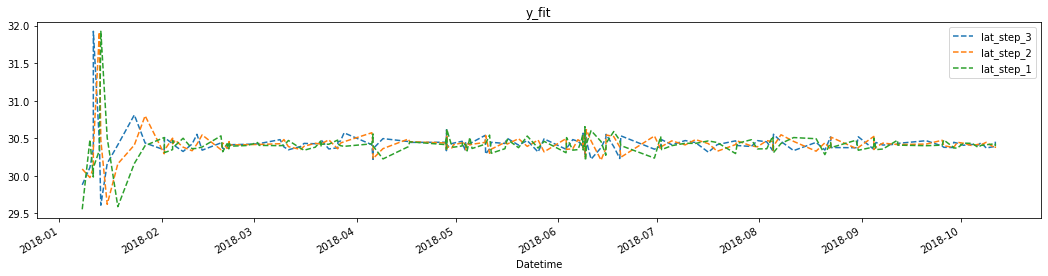

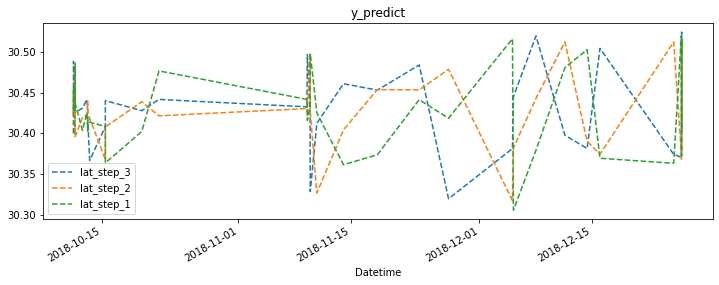

In [60]:
#plotting the fit and predict outcome
ax = y_fit.plot(style='--', title="y_fit", figsize=(18,4))
ax = y_pred .plot(style='--', title="y_predict", figsize=(12,4))

In [61]:
## Direct strategy with XGBoost using direct reduction strategy with scikit-learn's MultiOutputRegressor
from sklearn.multioutput import MultiOutputRegressor

D_model = MultiOutputRegressor(XGBRegressor())
D_model.fit(X_train, y_train)

y_fit = pd.DataFrame(D_model.predict(X_train), index=X_train.index, columns=leads.columns)
y_pred = pd.DataFrame(D_model.predict(X_test), index=X_test.index, columns=leads.columns)

#error:
train_rmse = mean_squared_error(y_train, y_fit, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print((f"Train RMSE: {train_rmse:.3f}\n" f"Test RMSE: {test_rmse:.3f}"))

Train RMSE: 0.001
Test RMSE: 0.842


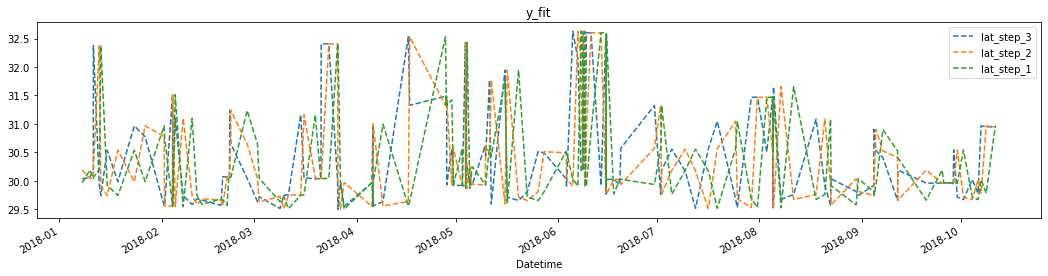

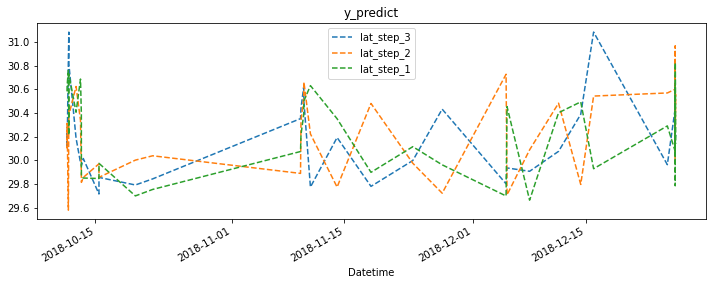

In [62]:
#plotting the fit and predict outcome
ax = y_fit.plot(style='--', title="y_fit", figsize=(18,4))
ax = y_pred .plot(style='--', title="y_predict", figsize=(12,4))

# Prediction with Neural Prophet

In [16]:
#creaing a db for neural prophet to use later
npForArava=Quake_Ar[['Datetime', 'Mw']]
npForArava.dropna(inplace=True)
#changing the column names to meat Neuralprophet's expectations/requirments
npForArava.columns=['ds', 'y']
npForArava.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\yelsk\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
2,2018-01-02 12:49:34,2.6
3,2018-01-02 17:10:56,1.1
5,2018-01-05 04:33:17,4
7,2018-01-06 00:07:14,2.4
9,2018-01-06 19:21:12,2


In [17]:
#creating a new instance of our model - untrained
mod=NeuralProphet()
# train the model (freq='D'= daily frequency)
mod.fit(npForArava, freq='D', epochs=100)

WARNING - (py.warnings._showwarnmsg) - C:\Users\yelsk\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/262 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.18E-02, min: 9.24E-01


  0%|          | 0/262 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.86E-02, min: 9.24E-01


  0%|          | 0/262 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.56E-02, min: 7.28E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.86E-02
Epoch[100/100]: 100%|██████████| 100/100 [00:13<00:00,  7.38it/s, SmoothL1Loss=0.0296, MAE=0.713, RMSE=0.918, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.565983,3.650529,4.501536,0.0
1,0.520147,3.454755,4.263060,0.0
2,0.452618,3.159444,3.902011,0.0
3,0.355913,2.723417,3.379302,0.0
4,0.239269,2.155218,2.680615,0.0
...,...,...,...,...
95,0.029661,0.715798,0.916073,0.0
96,0.029623,0.713313,0.915008,0.0
97,0.029595,0.712813,0.914651,0.0
98,0.029579,0.713099,0.913830,0.0


In [19]:
#forcasting after we trained our model
futurequ=mod.make_future_dataframe(npForArava, periods=50)
forcastQ=mod.predict(futurequ)
forcastQ.tail()

,ds,y,yhat1,residual1,trend,season_weekly,season_daily
45,2019-02-15 19:10:59,None,2.704535,NaN,2.907151,-0.072780,-0.129836
46,2019-02-16 19:10:59,None,2.769885,NaN,2.913631,-0.013910,-0.129836
47,2019-02-17 19:10:59,None,2.991653,NaN,2.920113,0.201376,-0.129836
48,2019-02-18 19:10:59,None,2.824625,NaN,2.926594,0.027868,-0.129836
49,2019-02-19 19:10:59,None,2.713341,NaN,2.933074,-0.089897,-0.129836


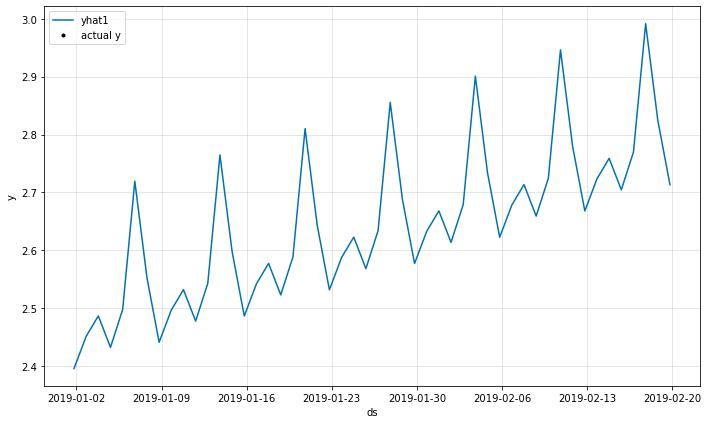

In [20]:
plot1=mod.plot(forcastQ)

In [21]:
#dave dataframe as excel file for creating power bi dashboard
forcastQ.to_excel('forcastQ.xlsx')

In [22]:
#another model for validation from npForArava dataframe
model=NeuralProphet()
npForArava_train, npForArava_test=model.split_df(npForArava, valid_p=0.1, freq='D')


In [23]:
#training and validation metrics
train_metrics=model.fit(npForArava_train, freq='D')
test_metrics= model.test(npForArava_test)

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 160


  0%|          | 0/260 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.87E-02, min: 1.56E+00


  0%|          | 0/260 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.41E-02, min: 1.13E+00


  0%|          | 0/260 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.41E-02, min: 1.13E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.56E-02
Epoch[160/160]: 100%|██████████| 160/160 [00:19<00:00,  8.06it/s, SmoothL1Loss=0.0301, MAE=0.68, RMSE=0.875, RegLoss=0] 
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.067  1.022  1.322


In [24]:
test_metrics

,SmoothL1Loss,MAE,RMSE
0,0.067328,1.021582,1.321952


It seems like those stats are very good. After looking for some kind of leakage and not finding it, I suspect that the reason is that the Mw values I'm trying to fit are small (mostly between 1.5 and 2), and therefore the errors are less then 1 (and even less so while squared). to test that I will try to predict values 10 times bigger then Mw and then see if the metrics show much bigger errors.

In [25]:
#creating dataframe with 10X the value of Mw
np_10_ForArava= npForArava[['ds', 'y']]
np_10_ForArava['y']=np_10_ForArava['y']*10
np_10_ForArava.head()


,ds,y
2,2018-01-02 12:49:34,26.0
3,2018-01-02 17:10:56,11.0
5,2018-01-05 04:33:17,40.0
7,2018-01-06 00:07:14,24.0
9,2018-01-06 19:21:12,20.0


In [26]:
# model for validation from np_10_ForArava dataframe
model_10=NeuralProphet()
np_10_ForArava_train, np_10_ForArava_test=model.split_df(np_10_ForArava, valid_p=0.1, freq='D')

#training and validation metrics
train_metrics=model_10.fit(np_10_ForArava_train, freq='D')
test_metrics= model_10.test(np_10_ForArava_test)

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 160


  0%|          | 0/260 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.00E-02, min: 7.59E-01


  0%|          | 0/260 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.61E-02, min: 7.01E-01


  0%|          | 0/260 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.26E-02, min: 6.47E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.61E-02
Epoch[160/160]: 100%|██████████| 160/160 [00:23<00:00,  6.87it/s, SmoothL1Loss=0.0301, MAE=6.79, RMSE=8.73, RegLoss=0]
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.068 10.219 13.241


In [27]:
#exploring values in my dataframe
#np_10_ForArava['y'].min()
np_10_ForArava_test['ds'].max()
#np_10_ForArava_train['ds'].max()

Timestamp('2018-12-31 19:10:59')

In [28]:
#Saving our model with Pickle
with open ('eq_forcast_model.pkl', "wb") as f:
    pickle.dump(model_10, f)

In [29]:
#reload the model
with open ('eq_forcast_model.pkl', "rb") as f:
    m=pickle.load(f)

In [30]:
m

In [31]:
#check if our model indeed have the same metrics:  0.050  4.018  5.378 --which indeed it does:)
test_metrics= m.test(np_10_ForArava_test)


INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.068 10.219 13.241


Plotting and trying to forcast the location (North-South) of the earthquake

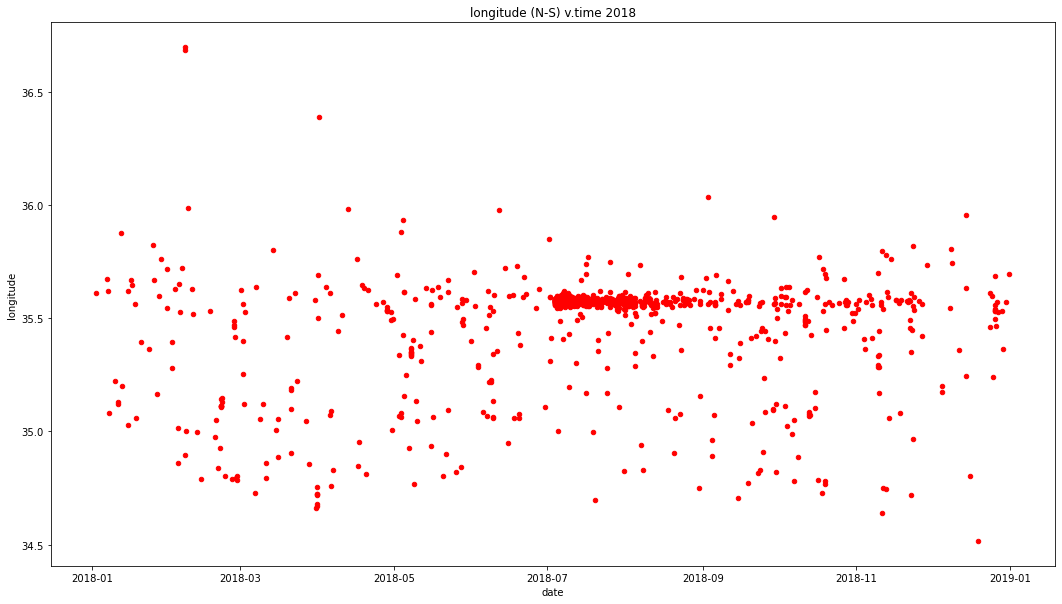

In [32]:
##DF only earthquakes along Dead Sea fault region
Quake_DSR=Quakeplt.loc[Quakeplt['Region'].isin (['Yamune', 'Lebanon', 'Roum', 'Hula-Kinneret', 'Jordan-Valley', 'E.Shomron', 'Dead-Sea-Basin', 'Arava', 'arava', 'Barak-fault', 'W.sirhan', 'Eilat-Deep', 'Aragonese_Deep', 'Arnona-Dakar-Deep'])]
Quake_DSR.head()

#plotting earthquake's magnitude(Mw) vs time in 2018 of dead sea basin
Quake_DSR.plot(kind='scatter', x='Datetime', y='Long',figsize=(18, 10),c='red')
plt.title(r'longitude (N-S) v.time 2018')
plt.xlabel('date')
plt.ylabel('longitude')

plt.show()

In [33]:
#creaing a db for neural prophet to use later
npForDSR=Quake_DSR[['Datetime', 'Long']]
npForDSR.dropna(inplace=True)
#changing the column names to meet Neuralprophet's expectations/requirments
npForDSR.columns=['ds', 'y']
npForDSR.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\yelsk\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
3,2018-01-02 17:10:56,35.6112
9,2018-01-06 19:21:12,35.6748
14,2018-01-07 06:58:51,35.6191
16,2018-01-07 21:37:37,35.0804
19,2018-01-10 05:37:52,35.2222


In [34]:
#creating a new instance of our model - untrained
model=NeuralProphet()
# train the model (freq='D'= daily frequency)
npForDSR_train, npForDSR_test=model.split_df(npForDSR, valid_p=0.1, freq='D')

#training and validation metrics
train_metrics=model.fit(npForDSR_train, freq='D')
test_metrics= model.test(npForDSR_test)

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 178


  0%|          | 0/251 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.75E-02, min: 2.21E+00


  0%|          | 0/251 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.25E-02, min: 1.72E+00


  0%|          | 0/251 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.79E-02, min: 1.46E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.25E-02
Epoch[178/178]: 100%|██████████| 178/178 [00:21<00:00,  8.47it/s, SmoothL1Loss=0.0182, MAE=0.104, RMSE=0.18, RegLoss=0] 
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.058  0.289  0.328


In [35]:
test_metrics

,SmoothL1Loss,MAE,RMSE
0,0.057583,0.289272,0.328332


In [36]:
#forcasting after the model was trained
futurequ=model.make_future_dataframe(npForDSR, periods=50)
forcastQ=model.predict(futurequ)
forcastQ.tail()

,ds,y,yhat1,residual1,trend,season_weekly,season_daily
45,2019-02-15 19:10:59,None,35.068935,NaN,35.075848,0.004836,-0.011749
46,2019-02-16 19:10:59,None,35.049210,NaN,35.073536,-0.012577,-0.011749
47,2019-02-17 19:10:59,None,35.061302,NaN,35.071224,0.001824,-0.011749
48,2019-02-18 19:10:59,None,35.064819,NaN,35.068913,0.007654,-0.011749
49,2019-02-19 19:10:59,None,35.033188,NaN,35.066601,-0.021666,-0.011749


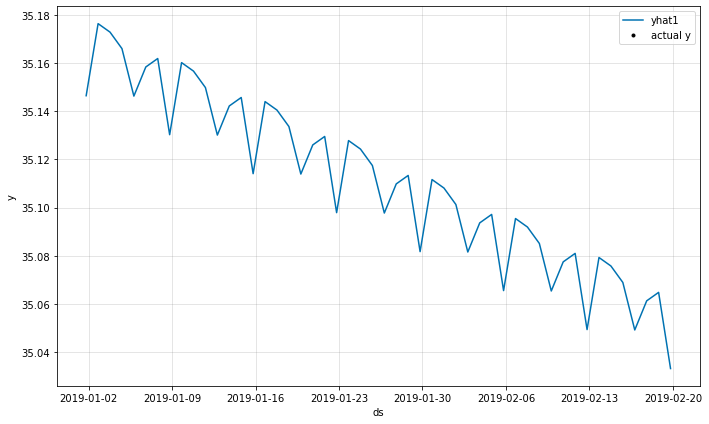

In [37]:
plot1=mod.plot(forcastQ)

#looks like the prediction is that the earthquakes will move to the west in time

In [38]:
#dave dataframe as excel file for creating power bi dashboard
forcastQ.to_excel('forcastDSR.xlsx')